# 상관분석

## #01. 작업준비

### 패키지 가져오기

In [1]:
from pandas import read_excel
from scipy import stats
import numpy as np

import sys
import seaborn as sb
from matplotlib import pyplot as plt

## 예제(1) 언어영역 점수와 수리영역 점수의 상관관계

### 데이터 가져오기

In [2]:
df = read_excel("https://data.hossam.kr/E03/point.xlsx")
df

,언어영역,수리영역
0,392,428
1,404,518
2,346,376
3,382,426
4,368,409
5,449,490
6,391,448


> 언어영역과 수리영역의 상관관계 분석!

## #02. 탐색적 데이터 분석

### 산점도 그래프를 통한 상관정도 확인

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False

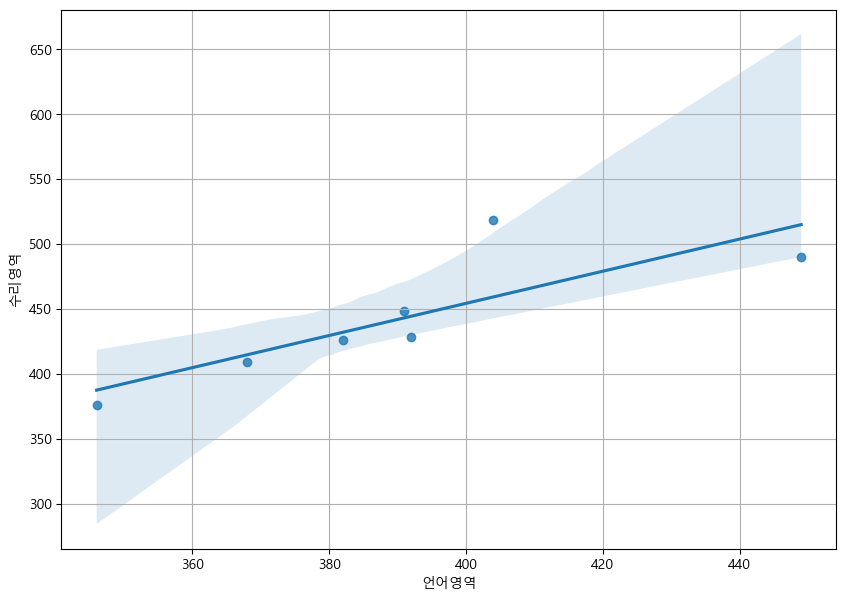

In [4]:
plt.figure()
#sb.scatterplot(data=df, x='언어영역',y='수리영역')
sb.regplot(data=df,x='언어영역',y='수리영역')
plt.grid()
plt.show()
plt.close()

## #03. 공분산

공분산은 상관관계의 상승 혹은 하강하는 경향을 이해할 수는 있으나, 2개 변수의 측정 단위의 크기에 따라 값이 달라지므로 절대적 정도를 파악하기에는 한계가 있다.

결과값이 양수면 정비례, 음수면 반비례

> 그래서 잘 안쓴다.

In [5]:
np.cov(df['언어영역'],df['수리영역'])[0,1]

1271.9523809523807

## #04. 상관분석

### numpy를 통한 상관계수 구하기

`p-value` 는 알 수 없기 때문에 분석 결과를 검정할 수 없다.

In [6]:
np.corrcoef(df['언어영역'], df['수리영역'])[0,1]

0.821064207442306

In [7]:
# 상관행렬
np.corrcoef(df['언어영역'], df['수리영역'])
# array([[1.        , 0.82106421],
    #    [0.82106421, 1.        ]])
# < 상관계수> 언어     수학
# 언어

# 수학

array([[1.        , 0.82106421],
       [0.82106421, 1.        ]])

> 채택해도 되는지 알아보려면 p-value값을 구해야한다. => scipy.stats 패키지 사용

### 피어슨 상관계수와 p-value 구하기

In [12]:
r, p = stats.pearsonr(df['언어영역'], df['수리영역'])

"상관계수 : %f, p-value: %f" % (r,p)

'상관계수 : 0.821064, p-value: 0.023564'

#### 결과해석

`p-value` 가 유의수준 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 그러므로 언어영역 점수와 수리영역 점수는 상관이 있다. 

### 데이터프레임 객체를 통한 상관계수 구하기

numpy를 통해 구한 결과와 동일하다.

이와 같이 표시되는 형태를 상관행렬이라고 한다.

In [9]:
corr = df.corr(method='pearson')
corr

,언어영역,수리영역
언어영역,1.000000,0.821064
수리영역,0.821064,1.000000


### 상관분석 결과 시각화

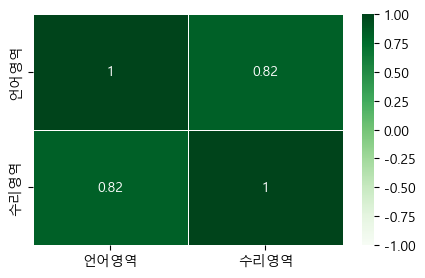

In [11]:
plt.rcParams['figure.figsize'] = (5,3)

sb.heatmap(corr,
           annot=True, #실제 값 화면에 나타내기
           cmap='Greens', #색상
           vmin=-1, vmax=1, #컬러차트 영역 -1~+1
           linewidths=.5) #구분선

plt.show()
plt.close()

## 에제(2) - mtcars 데이터를 통한 실린더수와 연비의 상관관계 분석

R패키지인 ggplot2에 내장된 샘플 데이터로 자동차 32종의 11개 속성에 대한 정보를 담고 있는 데이터

|필드|설명|
|--|---|
|mpg|연료 효율성(마일 당 갤런)|
|cyl|실린더 수|
|disp|배기량 (cubiv inches)|
|hp|마력 (horsepower)|
|drat|후륜축비율 (rear axle ratio)|
|wt|차량 무게 (1000 파운드)|
|qsec|1/4마일 달성 시간 (초)|
|vs|V/S (V엔진 형태인지, S는 직력 엔진 형태인지를 나타냄)|
|am|변속기 형태 (0:자동, 1:수동)|
|gear|전진 기어 수 (전송기어)|
|carb|기화기개수 (carburetors)|

### 데이터 가져오기

In [13]:
df = read_excel("https://data.hossam.kr/E03/mtcars.xlsx", index_col='name')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


### 실린더 수에 따른 연비에 대한 산점도 그래프

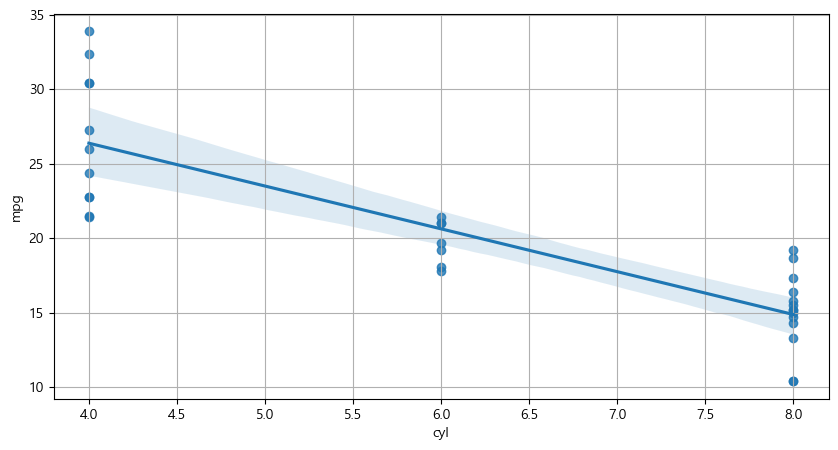

In [14]:
plt.rcParams['figure.figsize'] = (10,5)

sb.regplot(data=df, x='cyl', y='mpg')
plt.grid()
plt.show()
plt.close()

- 실린더 수가 증가함에 따라 연비가 낮아지는 경향이 있는 것으로 보임

### 상관분석

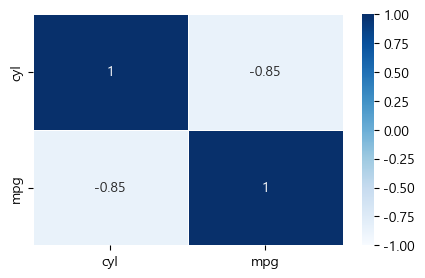

In [22]:
plt.rcParams['figure.figsize'] = (5,3)

corr = df.filter(['cyl','mpg']).corr(method='pearson')

sb.heatmap(corr,
           annot=True,
           cmap='Blues',
           vmin=-1, vmax=1,
           linewidths=.5)

plt.show()
plt.close()

- 분석결과 상관계수가 `-0.85`로 나타나 실린더수와 연비는 강한 음의 상관관계가 있는 것으로 나타남.

### 분석결과 검증

In [24]:
stats.pearsonr(df['cyl'],df['mpg'])
"상관계수: %f, p-value: %f" % (r, p)

'상관계수: -0.852162, p-value: 0.000000'

### 결과보고

32종의 자동차를 대상으로 실린더수에 따른 연비를 조사한 결과 실린더 수와 연비는 강한 음의 상관관계를 갖는 것으로 나타났다.

`p-value`가 유의수준 0.05보다 작으므로 이는 통계적으로 유의하다.